In [1]:
import gym
import numpy as np

ENV = gym.make("CartPole-v1")

NUM_FEATURES   = 4
LAMBDA         = 50
SIGMA          = 0.05
ALPHA          = 0.001
NUM_EPISODES   = 50
EPISODE_LENGTH = 500
MAX_REWARD     = EPISODE_LENGTH


def sample_population(mu):
    noise = np.random.randn(LAMBDA, NUM_FEATURES)
    return mu + SIGMA * noise, noise


def sample_action(sample, observation):
    return 1 if np.dot(observation, sample) > 0.0 else 0


def evaluate(sample):
    total_reward = 0.0
    observation = ENV.reset()
    for step in range(EPISODE_LENGTH):
        action = sample_action(sample, observation)
        observation, reward, done, _ = ENV.step(action)
        total_reward += reward
        if done: break
    return total_reward


def play(mu):
    observation = ENV.reset()
    for step in range(EPISODE_LENGTH):
        ENV.render()
        action = sample_action(mu, observation)
        observation, _, done, _ = ENV.step(action)
        if done:
            print("Episode finished after {} timesteps".format(step + 1))
            break

In [2]:
epsilon = 1e-200

def run_episodes(n_episodes=NUM_EPISODES):
    mu = np.zeros(NUM_FEATURES)

    best_reward = 0.0
    best_reward_history  = np.zeros(n_episodes)
    total_reward_history = np.zeros(n_episodes)

    for episode in range(n_episodes):
        population, noise = sample_population(mu)
        rewards = map(evaluate, population)
        rewards = np.fromiter(rewards, float)

        ### update mu to sample with highest reward
        # sort_idx = np.argsort(rewards)
        # rewards = rewards[sort_idx][::-1]
        # population = population[sort_idx][::-1]
        # if rewards[0] >= best_reward:
        #     best_reward = rewards[0]
        #     mu = population[0]

        ### update based on https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d
        rewards_std = (rewards - np.mean(rewards)) / (np.std(rewards, ddof=1) + epsilon)
        mu += ALPHA / (LAMBDA * SIGMA) * np.dot(noise.T, rewards_std)

        ### update history for plots
        best_reward_history[episode]  = np.max(rewards)
        total_reward_history[episode] = np.sum(rewards)
    # print("total episodes: {}".format(LAMBDA * NUM_EPISODES))
    return mu, best_reward_history, total_reward_history
    

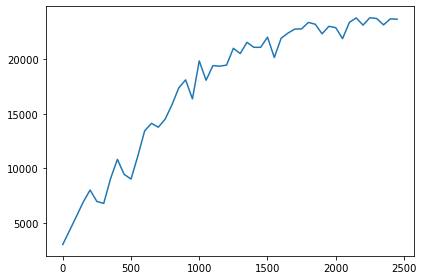

In [3]:
import matplotlib.pyplot as plt

mu, brh, trh = run_episodes()

x_axis = np.array(range(NUM_EPISODES)) * LAMBDA
# plt.plot(x_axis, brh)
plt.plot(x_axis, trh)
plt.tight_layout()
plt.show()

In [4]:
NUM_TRIALS = 100
N = 10

total = 0
for n in range(N):
    mu, _, _ = run_episodes()
    success = 0
    for i in range(NUM_TRIALS):
        reward = evaluate(mu)
        if reward >= MAX_REWARD - 5: success += 1
    print("{}: {}/{} = {}%, mu: {}".format(n, success, NUM_TRIALS, success / NUM_TRIALS, mu))
    total += success
    # play(mu)
    # print("mu: {}".format(mu))
print("total: {}/{} = {}%".format(total, NUM_TRIALS * N, total / (NUM_TRIALS * N)))

0: 100/100 = 1.0%, mu: [0.00526188 0.11022558 0.21696097 0.2320652 ]
1: 100/100 = 1.0%, mu: [0.00860121 0.10088402 0.24626093 0.2245934 ]
2: 100/100 = 1.0%, mu: [0.0105084  0.11772554 0.21990819 0.21753799]
3: 100/100 = 1.0%, mu: [0.00573526 0.12492882 0.23888763 0.21987425]
4: 100/100 = 1.0%, mu: [0.00686787 0.10733761 0.23543772 0.22557212]
5: 100/100 = 1.0%, mu: [0.01694887 0.1079729  0.25098928 0.228651  ]
6: 100/100 = 1.0%, mu: [0.01121615 0.09892118 0.24204019 0.20458323]
7: 100/100 = 1.0%, mu: [-0.00286996  0.11742344  0.21964612  0.21521332]
8: 100/100 = 1.0%, mu: [0.00603046 0.09614389 0.23527614 0.22057531]
9: 100/100 = 1.0%, mu: [0.0025869  0.08344043 0.22764086 0.21666645]
total: 1000/1000 = 1.0%


In [5]:
# play(mu)

Episode finished after 500 timesteps
